# 数据增广

当应用场景中出现训练集和数据集中未涉及的情况，如色差，色温变化，则准确率会大幅度下降

## 数据增强

> 在线增广(实时处理，一般数据集大小不发生改变)，离线增广

- 语言处理：添加不同的背景噪音
- 图片中添加颜色和形状

### 处理方法

- 翻转
    - 左右翻转
    - 上下翻转（注意：不是总是可行的）
- 切割
    - 随机高宽比：切割后的高宽比例
    - 随机大小：切割的大小
    - 
- 颜色

In [1]:
from PIL import Image
import torch
import torchvision
import os
from matplotlib import pyplot as plt
from matplotlib_inline import backend_inline
%matplotlib inline
backend_inline.set_matplotlib_formats('svg')
# 设置随机值，固定结果
torch.manual_seed(17)

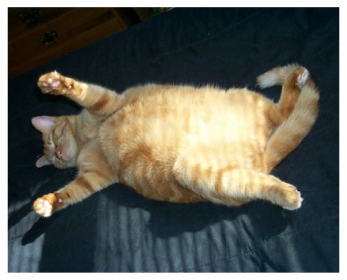

In [2]:
img_path = os.path.join(".", "img", "cat1.jpg")
img = Image.open(img_path)
plt.imshow(img)
plt.axis('off')
plt.rcParams['figure.figsize'] = (3.5, 2.5)


In [3]:
""" 应用transforms """
def apply(img, aug, num_rows=2, num_cols=4, scale=1.5):
    Y = [aug(img) for _ in range(num_rows * num_cols)]
    imshows(Y, num_rows, num_cols, scale)

def imshows(imgs, num_rows=2, num_cols=4, scale=1.5):
    plt.rcParams['figure.figsize'] = (num_cols * scale, num_rows * scale)
    for i in range(num_rows * num_cols):
        plt.subplot(num_rows, num_cols, i + 1)
        plt.axis('off')
        plt.imshow(imgs[i])
    plt.show()

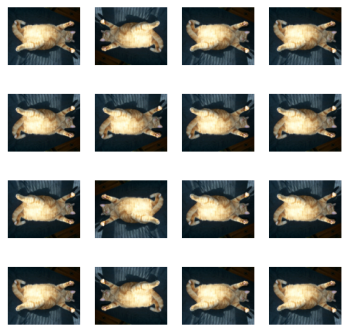

In [4]:
""" 翻转 """
apply(img, torchvision.transforms.Compose([
    torchvision.transforms.RandomHorizontalFlip(),  # 随机上下翻转
    torchvision.transforms.RandomVerticalFlip()     # 随机左右翻转
]), 4, 4)

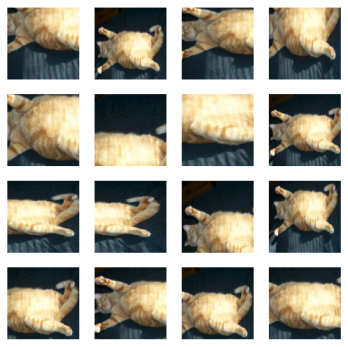

In [5]:
""" 随机剪裁 """
apply(img, torchvision.transforms.Compose([
    torchvision.transforms.RandomResizedCrop(
        size = (200, 200),      # 输出的大小
        scale = (0.1, 1.0),     # 剪裁的大小
        ratio = (0.5, 2)        # 剪裁区域的宽高比
    )
]), 4, 4)

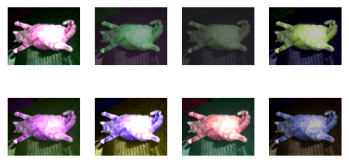

In [6]:
""" 改变颜色 """
apply(
    img, torchvision.transforms.Compose([
        torchvision.transforms.ColorJitter(
            brightness = 0.5,   # 亮度
            contrast = 0.5,     # 对比度
            saturation = 0.5,   # 饱和度
            hue = 0.5           # 色调
        )
    ])
)

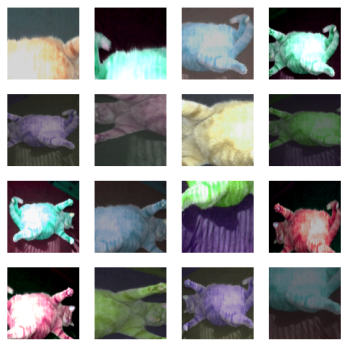

In [7]:
""" 结合多种 """
augs = [
    torchvision.transforms.RandomHorizontalFlip(0.5),
    torchvision.transforms.RandomResizedCrop(
        size = (200, 200), scale = (0.1, 1.0), ratio = (0.5, 2.0)
    ),
    torchvision.transforms.ColorJitter(
        brightness = 0.5, contrast = 0.5, saturation = 0.5, hue = 0.5
    )
]
apply(img, torchvision.transforms.Compose(augs), 4, 4)

In [8]:
""" 数据集 """
imgs = torchvision.datasets.CIFAR10(train=True, root=os.path.join('.', 'data'), download=True)

Files already downloaded and verified
